# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading

* **Pytorch Version** 



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)   
* [RLlib Section](#7)            

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
## install finrl library

#!pip install git+https://github.com/AI4Finance-Foundation/FinRL-Library.git

In [ ]:
!git clone https://github.com/AI4Finance-Foundation/FinRL.git

Cloning into 'FinRL'...
remote: Enumerating objects: 11079, done.
remote: Counting objects: 100% (408/408), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 11079 (delta 216), reused 350 (delta 179), pack-reused 10671
Receiving objects: 100% (11079/11079), 74.00 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (7257/7257), done.


In [ ]:
!pip install -r /content/FinRL/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 53.9 MB/s 
     |████████████████████████████████| 234 kB 71.3 MB/s 
     |████████████████████████████████| 152 kB 49.5 MB/s 
     |████████████████████████████████| 153 kB 59.9 MB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 199 kB 7.9 MB/s 
     |████████████████████████████████| 54.5 MB 258 kB/s 
     |████████████████████████████████| 952 kB 67.4 MB/s 
     |████████████████████████████████| 177 kB 74.8 MB/s 
     |████████████████████████████████| 125 kB 76.7 MB/s 
     |████████████████████████████████| 271 kB 77.2 MB/s 
     |████████████████████████████████| 1.1 MB 64.0 MB/s 
     |████████████████████████████████| 4.1 MB 53.4 MB/s 
     |████████████████████████████████| 94 kB 962 kB/s 
     |████████████████████████████████| 596 kB 57.1 MB/s 
     |████████████████████████████

In [ ]:
# remove your installed pyfolio library
!pip uninstall pyfolio

# Install it again from its github repo
!pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-_gbegu7_
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-_gbegu7_
     |████████████████████████████████| 52 kB 960 kB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75774 sha256=70c89ae8980e0f3566b3b11ed7549668939d23c9d630ee7befd9713b5f0fc350
  Stored in directory: /tmp/pip-ephem-wheel-cache-y5aoq7n8/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39780 sha256=a793f3425399f0a22ebb8a0bf67912b9dbe6d42b148251758b4ac828a780fbfe
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 32.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alpaca-trade-api 2.3.0 requires PyYAML==6.0, but you have pyyaml 5.4.1 which is incompatible.


#**Restart Runtime**

In [ ]:
%cd /content/FinRL

/content/FinRL


In [ ]:
from finrl import config
from finrl import config_tickers
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them. 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
 # matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl import config
from finrl import config_tickers
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


<a id='1.4'></a>
## 2.4. Create Folders

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [ ]:
# from config.py TRAIN_START_DATE is a string
config.TRAIN_START_DATE

'2014-01-06'

In [ ]:
# from config.py TRAIN_END_DATE is a string
config.TRAIN_END_DATE

'2020-07-31'

In [ ]:
tickers=['APOLLOHOSP.NS',
'BAJFINANCE.NS',
'NESTLEIND.NS',
'RELIANCE.NS',
'TECHM.NS',
'ITC.NS',
'KOTAKBANK.NS',
'SHREECEM.NS',
'BRITANNIA.NS',
'BAJAJFINSV.NS',
'INDUSINDBK.NS',
'BAJAJ-AUTO.NS',
'LT.NS',
'ULTRACEMCO.NS',
'BHARTIARTL.NS',
'CIPLA.NS',
'ICICIBANK.NS',
'NTPC.NS',
'HDFCLIFE.NS',
'TCS.NS',
'MARUTI.NS',
'WIPRO.NS',
'TATASTEEL.NS',
'TATACONSUM.NS',
'COALINDIA.NS',
'ONGC.NS',
'HEROMOTOCO.NS',
'HINDALCO.NS',
'TITAN.NS',
'BPL.NS']

In [ ]:
df = YahooDownloader(start_date = '2018-01-01',
                     end_date = '2022-05-30',
                     ticker_list = tickers).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
print(tickers)

['APOLLOHOSP.NS', 'BAJFINANCE.NS', 'NESTLEIND.NS', 'RELIANCE.NS', 'TECHM.NS', 'ITC.NS', 'KOTAKBANK.NS', 'SHREECEM.NS', 'BRITANNIA.NS', 'BAJAJFINSV.NS', 'INDUSINDBK.NS', 'BAJAJ-AUTO.NS', 'LT.NS', 'ULTRACEMCO.NS', 'BHARTIARTL.NS', 'CIPLA.NS', 'ICICIBANK.NS', 'NTPC.NS', 'HDFCLIFE.NS', 'TCS.NS', 'MARUTI.NS', 'WIPRO.NS', 'TATASTEEL.NS', 'TATACONSUM.NS', 'COALINDIA.NS', 'ONGC.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'TITAN.NS', 'BPL.NS']


In [ ]:
df.shape

(32610, 8)

In [ ]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2018-01-01,1216.000000,1216.000000,1199.099976,1187.509521,117565,APOLLOHOSP.NS,0
1,2018-01-01,3340.000000,3345.050049,3276.399902,2810.548096,174560,BAJAJ-AUTO.NS,0
2,2018-01-01,5208.000000,5308.750000,5151.600098,5162.650879,44899,BAJAJFINSV.NS,0
3,2018-01-01,1759.500000,1760.000000,1720.400024,1706.749023,535319,BAJFINANCE.NS,0
4,2018-01-01,487.552704,494.071777,482.410919,473.010590,4719333,BHARTIARTL.NS,0


# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = config.INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1109, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [ ]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2018-01-02,APOLLOHOSP.NS,1205.000000,1212.000000,1186.500000,1177.042236,211424.0,1.0,-0.234843,1197.078856,1167.472902,0.0,-66.666667,100.0,1182.275879,1182.275879,9.77,0.0
1,2018-01-02,BAJAJ-AUTO.NS,3309.000000,3348.000000,3280.000000,2815.247314,297721.0,1.0,0.105431,2819.543404,2806.252006,100.0,66.666667,100.0,2812.897705,2812.897705,9.77,0.0
2,2018-01-02,BAJAJFINSV.NS,5199.899902,5229.000000,5047.750000,5092.026367,79123.0,1.0,-1.584524,5227.216765,5027.460481,0.0,-66.666667,100.0,5127.338623,5127.338623,9.77,0.0
3,2018-01-02,BAJFINANCE.NS,1739.699951,1739.699951,1710.000000,1705.760132,576208.0,1.0,-0.022187,1707.653082,1704.856074,0.0,-66.666667,100.0,1706.254578,1706.254578,9.77,0.0
4,2018-01-02,BHARTIARTL.NS,489.297241,489.297241,469.969604,462.840729,5145590.0,1.0,-0.228170,482.308014,453.543304,0.0,-66.666667,100.0,467.925659,467.925659,9.77,0.0
5,2018-01-02,BPL.NS,109.900002,109.900002,103.000000,104.800003,642459.0,1.0,-0.090865,112.552559,101.097442,0.0,-66.666667,100.0,106.825001,106.825001,9.77,0.0
6,2018-01-02,BRITANNIA.NS,2369.125000,2371.125000,2322.000000,2133.431396,176798.0,1.0,-0.845049,2205.530325,2098.997507,0.0,-66.666667,100.0,2152.263916,2152.263916,9.77,0.0
7,2018-01-02,CIPLA.NS,614.200012,619.000000,605.500000,596.525452,1038258.0,1.0,-0.081473,603.476627,593.205624,0.0,-66.666667,100.0,598.341125,598.341125,9.77,0.0
8,2018-01-02,COALINDIA.NS,268.000000,270.899994,267.000000,180.089050,5659389.0,1.0,0.050870,182.161906,175.748830,100.0,66.666667,100.0,178.955368,178.955368,9.77,0.0
9,2018-01-02,HDFCLIFE.NS,391.700012,398.000000,384.350006,391.484711,1219713.0,1.0,0.129918,396.778573,380.400229,100.0,66.666667,100.0,388.589401,388.589401,9.77,0.0


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

## Training data split: 2009-01-01 to 2020-07-01
## Trade data split: 2020-07-01 to 2021-10-31

In [ ]:
train = data_split(processed_full, '2018-01-01','2020-07-01')
trade = data_split(processed_full, '2020-07-01','2022-05-30')
print(len(train))
print(len(trade))

17790
13830


In [ ]:
train.tail()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
592,2020-06-30,TCS.NS,2100.000000,2111.899902,2075.050049,2023.690308,3071725.0,1.0,26.296123,2057.369164,1944.628040,55.017050,102.120855,22.104760,1977.825000,1880.752146,30.43,23.206281
592,2020-06-30,TECHM.NS,547.000000,548.900024,541.549988,510.043304,2356985.0,1.0,1.182019,559.724643,488.618814,46.868992,-14.456435,8.275310,514.547025,503.428357,30.43,23.206281
592,2020-06-30,TITAN.NS,965.000000,971.950012,946.400024,937.123596,1947529.0,1.0,10.468502,1000.126674,925.147654,48.649606,16.117046,5.197301,933.729736,915.897726,30.43,23.206281
592,2020-06-30,ULTRACEMCO.NS,3822.000000,3904.350098,3822.000000,3862.464600,494113.0,1.0,54.817352,3891.273088,3683.018636,54.112600,81.220065,22.583910,3750.052726,3554.429618,30.43,23.206281
592,2020-06-30,WIPRO.NS,219.600006,221.949997,218.000000,216.994583,5500693.0,1.0,5.288493,223.847516,206.189998,55.499468,60.649457,37.036196,208.566053,196.008063,30.43,23.206281


In [ ]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,APOLLOHOSP.NS,1350.000000,1353.550049,1311.000000,1316.697998,1066663.0,2.0,4.991207,1430.817518,1312.936010,46.452250,-82.551945,6.707392,1356.455501,1338.882393,28.620001,31.341983
0,2020-07-01,BAJAJ-AUTO.NS,2838.050049,2872.000000,2828.600098,2647.609863,525799.0,2.0,53.058920,2713.639844,2470.032031,56.463113,89.596863,26.355758,2552.204793,2408.655375,28.620001,31.341983
0,2020-07-01,BAJAJFINSV.NS,5818.000000,6194.799805,5802.649902,6165.633789,1724234.0,2.0,299.634355,6459.412256,4714.802246,55.916040,108.643349,28.231951,5251.714412,4971.554993,28.620001,31.341983
0,2020-07-01,BAJFINANCE.NS,2831.000000,2968.699951,2806.000000,2938.435303,12704896.0,2.0,183.393005,3132.420637,2096.843523,56.362184,112.033238,24.828145,2423.309802,2285.590442,28.620001,31.341983
0,2020-07-01,BHARTIARTL.NS,575.000000,575.000000,558.299988,558.182678,13638591.0,2.0,2.833751,585.408143,541.116332,52.867161,-18.527268,5.180226,564.452207,536.518993,28.620001,31.341983


In [ ]:
config.INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 30, State Space: 301


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

## Environment for Training



In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [ ]:
agent = DRLAgent(env = env_train)

### Model Training: 5 models, A2C DDPG, PPO, TD3, SAC


### Model 1: A2C


In [ ]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000)

### Model 2: DDPG

In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")  

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cuda device


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)

day: 592, episode: 90
begin_total_asset: 1000000.00
end_total_asset: 998990.76
total_reward: -1009.24
total_cost: 999.00
total_trades: 6512
Sharpe: 0.144
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 102       |
|    time_elapsed    | 23        |
|    total_timesteps | 2372      |
| train/             |           |
|    actor_loss      | 114       |
|    critic_loss     | 1.28e+03  |
|    learning_rate   | 0.001     |
|    n_updates       | 1779      |
|    reward          | 0.7945863 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 92        |
|    time_elapsed    | 51        |
|    total_timesteps | 4744      |
| train/             |           |
|    actor_loss      | 98.8      |
|    critic_loss     | 3.36      |
|    learning_rate   | 0.001     |
|    n_updates       | 4151      |
|    r

### Model 3: PPO

In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

------------------------------------
| time/              |             |
|    fps             | 254         |
|    iterations      | 1           |
|    time_elapsed    | 8           |
|    total_timesteps | 2048        |
| train/             |             |
|    reward          | -0.79102397 |
------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 242         |
|    iterations           | 2           |
|    time_elapsed         | 16          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.019367898 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.6       |
|    explained_variance   | 0.00296     |
|    learning_rate        | 0.00025     |
|    loss                 | 6.25        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0147  

### Model 4: TD3

In [ ]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cuda device


In [ ]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000)

day: 592, episode: 260
begin_total_asset: 1000000.00
end_total_asset: 1179439.27
total_reward: 179439.27
total_cost: 71371.35
total_trades: 9739
Sharpe: 0.382
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 110       |
|    time_elapsed    | 21        |
|    total_timesteps | 2372      |
| train/             |           |
|    actor_loss      | -34.8     |
|    critic_loss     | 731       |
|    learning_rate   | 0.001     |
|    n_updates       | 1779      |
|    reward          | 1.0961007 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 100       |
|    time_elapsed    | 47        |
|    total_timesteps | 4744      |
| train/             |           |
|    actor_loss      | -31.2     |
|    critic_loss     | 15.9      |
|    learning_rate   | 0.001     |
|    n_updates       | 4151      |
|

### Model 5: SAC

In [ ]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device


In [ ]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=60000)

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 59        |
|    time_elapsed    | 39        |
|    total_timesteps | 2372      |
| train/             |           |
|    actor_loss      | 426       |
|    critic_loss     | 31.9      |
|    ent_coef        | 0.123     |
|    ent_coef_loss   | 734       |
|    learning_rate   | 0.0001    |
|    n_updates       | 2271      |
|    reward          | 1.7568845 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 58        |
|    time_elapsed    | 81        |
|    total_timesteps | 4744      |
| train/             |           |
|    actor_loss      | 1.03e+03  |
|    critic_loss     | 64.4      |
|    ent_coef        | 0.156     |
|    ent_coef_loss   | 649       |
|    learning_rate   | 0.0001    |
|    n_updates       | 4643      |
|    reward         

## Trading
Assume that we have $1,000,000 initial capital at 2020-07-01. We use the DDPG model to trade Dow jones 30 stocks.

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data, if current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<'2020-07-01') & (processed_full.date>='2009-01-01')]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [ ]:
insample_risk_indicator.vix.describe()

count    593.000000
mean      19.330607
std       10.580877
min        9.150000
25%       13.220000
50%       15.800000
75%       20.100000
max       82.690002
Name: vix, dtype: float64

In [ ]:
insample_risk_indicator.vix.quantile(0.996)

75.74808276367185

In [ ]:
insample_risk_indicator.turbulence.describe()

count    593.000000
mean      28.312031
std       50.271472
min        0.000000
25%        0.000000
50%       19.257573
75%       34.358432
max      430.072295
Name: turbulence, dtype: float64

In [ ]:
insample_risk_indicator.turbulence.quantile(0.996)

344.4419898289154

### Trade

DRL model needs to update periodically in order to take full advantage of the data, ideally we need to retrain our model yearly, quarterly, or monthly. We also need to tune the parameters along the way, in this notebook I only use the in-sample data from 2009-01 to 2020-07 to tune the parameters once, so there is some alpha decay here as the length of trade date extends. 

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [ ]:
#trade = data_split(processed_full, '2020-07-01','2021-10-31')
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [ ]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,APOLLOHOSP.NS,1350.000000,1353.550049,1311.000000,1316.697998,1066663.0,2.0,4.991207,1430.817518,1312.936010,46.452250,-82.551945,6.707392,1356.455501,1338.882393,28.620001,31.341983
0,2020-07-01,BAJAJ-AUTO.NS,2838.050049,2872.000000,2828.600098,2647.609863,525799.0,2.0,53.058920,2713.639844,2470.032031,56.463113,89.596863,26.355758,2552.204793,2408.655375,28.620001,31.341983
0,2020-07-01,BAJAJFINSV.NS,5818.000000,6194.799805,5802.649902,6165.633789,1724234.0,2.0,299.634355,6459.412256,4714.802246,55.916040,108.643349,28.231951,5251.714412,4971.554993,28.620001,31.341983
0,2020-07-01,BAJFINANCE.NS,2831.000000,2968.699951,2806.000000,2938.435303,12704896.0,2.0,183.393005,3132.420637,2096.843523,56.362184,112.033238,24.828145,2423.309802,2285.590442,28.620001,31.341983
0,2020-07-01,BHARTIARTL.NS,575.000000,575.000000,558.299988,558.182678,13638591.0,2.0,2.833751,585.408143,541.116332,52.867161,-18.527268,5.180226,564.452207,536.518993,28.620001,31.341983


In [ ]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

hit end!


In [ ]:
df_account_value.shape

(461, 2)

In [ ]:
df_account_value.tail()

,date,account_value
456,2022-05-20,1.348550e+06
457,2022-05-23,1.334788e+06
458,2022-05-24,1.329565e+06
459,2022-05-25,1.329813e+06
460,2022-05-26,1.342098e+06


In [ ]:
df_actions.head()

,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,ONGC.NS,RELIANCE.NS,SHREECEM.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,0,0,0,0,0,100,100,100,0,0,...,12,0,0,0,0,0,0,0,100,0
2020-07-02,0,0,0,0,0,-100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.174497
Cumulative returns     0.342098
Annual volatility      0.182761
Sharpe ratio           0.973515
Calmar ratio           0.789696
Stability              0.615027
Max drawdown          -0.220967
Omega ratio            1.179802
Sortino ratio          1.419996
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.065119
Daily value at risk   -0.022320
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')


==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (480, 8)
Annual return          0.123399
Cumulative returns     0.248118
Annual volatility      0.152559
Sharpe ratio           0.840781
Calmar ratio           0.818722
Stability              0.670796
Max drawdown          -0.150722
Omega ratio            1.151318
Sortino ratio          1.179026
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.001464
Daily value at risk   -0.018712
dtype: float64


In [ ]:
df_account_value.loc[0,'date']

'2020-07-01'

In [ ]:
df_account_value.loc[len(df_account_value)-1,'date']

'2022-05-26'

<a id='6.2'></a>
## 7.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (480, 8)


Start date,2020-07-01
End date,2022-05-26
Total months,21
,Backtest
Annual return,17.45%
Cumulative returns,34.21%
Annual volatility,18.276%
Sharpe ratio,0.97
Calmar ratio,0.79
Stability,0.62
Max drawdown,-22.097%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.10,2021-11-08,2022-03-07,NaT,NaN
1,8.18,2020-08-24,2020-09-24,2020-10-08,34
2,7.74,2021-04-08,2021-05-04,2021-06-24,56
3,5.89,2021-01-11,2021-01-29,2021-02-02,17
4,5.70,2021-09-07,2021-10-25,2021-11-08,45


Stress Events,mean,min,max
New Normal,0.07%,-4.87%,4.41%


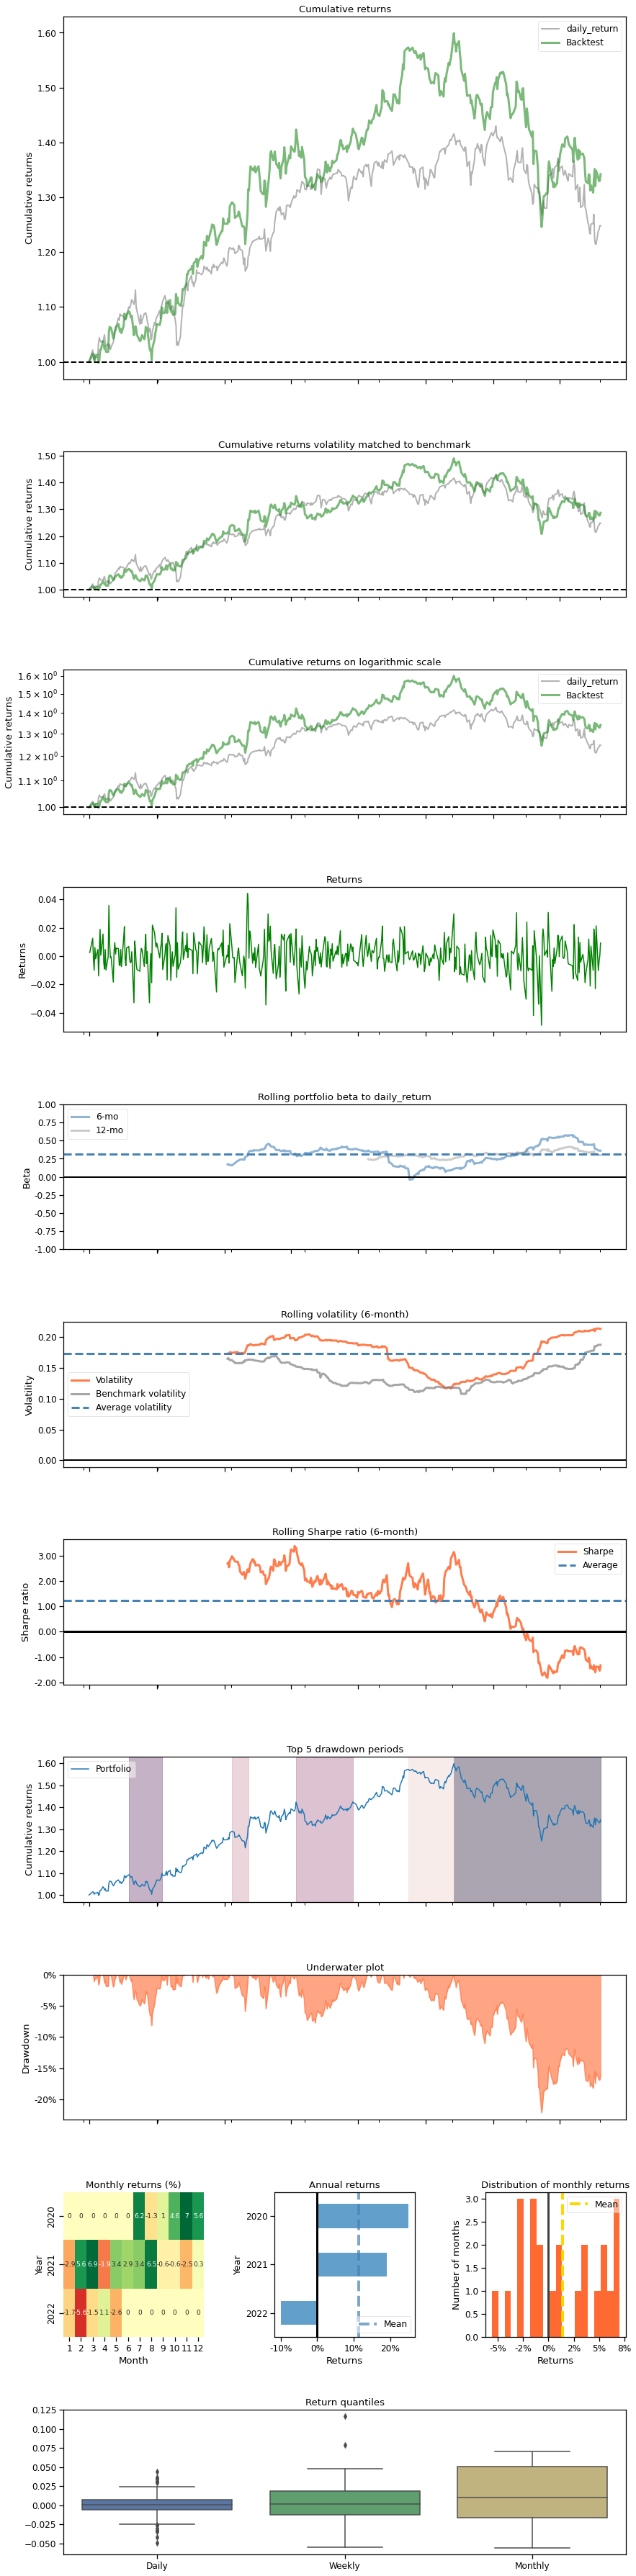

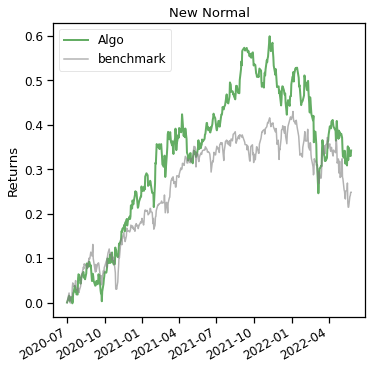

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])